In [2]:
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
from utils import box_plot

In [9]:
ESS_HUG       = load("experiment11c/ESS_HUG.npy")
ESS_LOGPI_HUG = load("experiment11c/ESS_LOGPI_HUG.npy")
A_HUG         = load("experiment11c/A_HUG.npy")
RMSE_HUG      = load("experiment11c/RMSE_HUG.npy")

ESS_THUG       = load("experiment11c/ESS_THUG.npy")
ESS_LOGPI_THUG = load("experiment11c/ESS_LOGPI_THUG.npy")
A_THUG         = load("experiment11c/A_THUG.npy")
RMSE_THUG      = load("experiment11c/RMSE_THUG.npy")

TS             = load("experiment11c/TS.npy")
ALPHAS         = load("experiment11c/ALPHAS.npy")

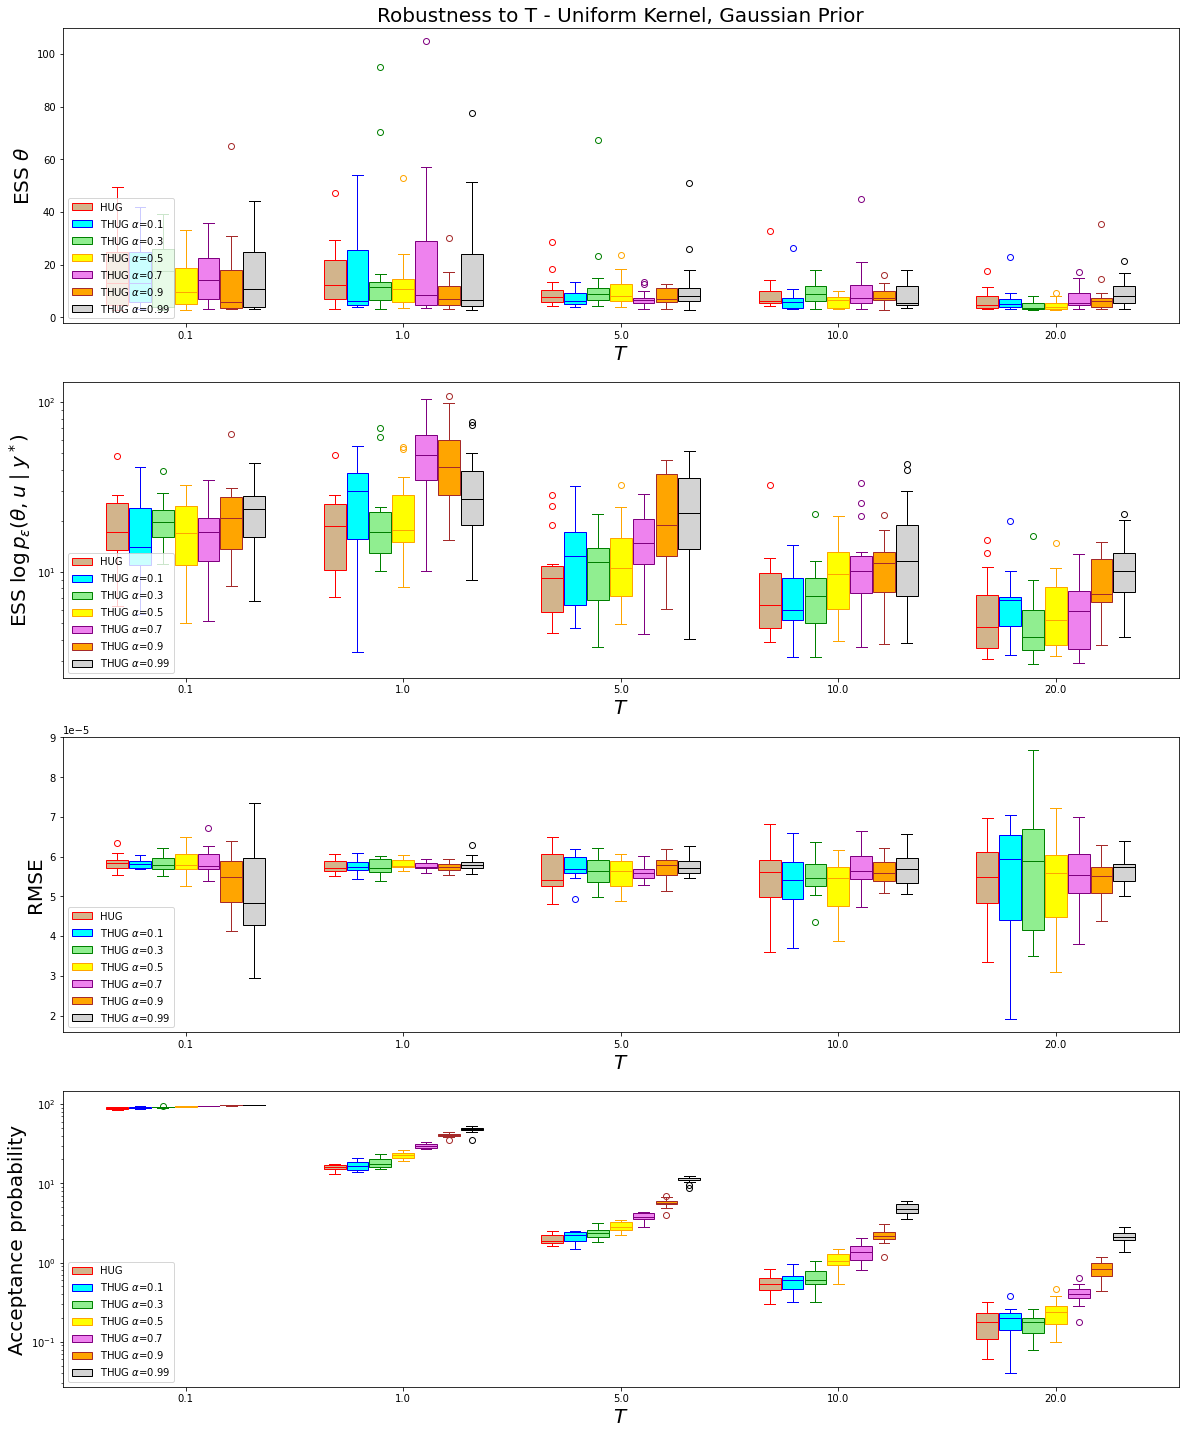

In [16]:
columns = TS
width = 0.21
n_alphas = len(ALPHAS)
ticks = np.arange(start=1, stop=len(columns)*2, step=2)
n_boxes = n_alphas + 1
disp = np.linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
colors1 = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black']
colors2 = ['tan', 'cyan', 'lightgreen', 'yellow', 'violet', 'orange', 'lightgray']

fig, ax = plt.subplots(nrows=4, figsize=(20, 25))
# Univariate ESS for \theta chain
bp1 = box_plot(ax[0], ESS_HUG.T.tolist(), 'red', 'tan', positions[0])
bps = []
for i in range(len(ALPHAS)):
    bps.append(box_plot(ax[0], ESS_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[0].legend(
    handles, 
    labels, 
    loc='lower left')
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(columns)
ax[0].set_xlabel("$T$", fontsize=20)
ax[0].set_ylabel("ESS $\\theta$", fontsize=20)
# ax[0].semilogy()

# ESS for joint ABC posterior
bp1_joint = box_plot(ax[1], ESS_LOGPI_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_joint = []
for i in range(len(ALPHAS)):
    bps_joint.append(box_plot(ax[1], ESS_LOGPI_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_joint["boxes"][0]] + [bp["boxes"][0] for bp in bps_joint]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[1].legend(
    handles, 
    labels, 
    loc='lower left')
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(columns)
ax[1].set_xlabel("$T$", fontsize=20)
ax[1].set_ylabel("ESS $\log p_{\\epsilon}(\\theta, u \mid y^*)$", fontsize=20)
ax[1].semilogy()

# RMSE 
bp1_rmse = box_plot(ax[2], RMSE_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_rmse = []
for i in range(len(ALPHAS)):
    bps_rmse.append(box_plot(ax[2], RMSE_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_rmse["boxes"][0]] + [bp["boxes"][0] for bp in bps_rmse]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[2].legend(
    handles, 
    labels, 
    loc='lower left')
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(columns)
ax[2].set_xlabel("$T$", fontsize=20)
ax[2].set_ylabel("RMSE", fontsize=20)
# ax[2].semilogy()

# ACCEPTANCE PROBABILITY 
bp1_a = box_plot(ax[3], A_HUG.T.tolist(), 'red', 'tan', positions[0])
bps_a = []
for i in range(len(ALPHAS)):
    bps_a.append(box_plot(ax[3], A_THUG[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
handles = [bp1_a["boxes"][0]] + [bp["boxes"][0] for bp in bps_a]
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(alpha) for alpha in ALPHAS]
ax[3].legend(
    handles, 
    labels, 
    loc='lower left')
ax[3].set_xticks(ticks)
ax[3].set_xticklabels(columns)
ax[3].set_xlabel("$T$", fontsize=20)
ax[3].set_ylabel("Acceptance probability", fontsize=20)
ax[3].semilogy()

ax[0].set_title("Robustness to T - Uniform Kernel, Gaussian Prior", fontsize=20)
plt.show()

In [11]:
A_HUG.mean(axis=0)

array([88.61733333, 16.012     ,  2.00266667,  0.54266667,  0.17466667])

In [12]:
A_THUG.mean(axis=0).T

array([[89.68666667, 16.68533333,  2.136     ,  0.6       ,  0.18933333],
       [91.616     , 18.388     ,  2.35066667,  0.64133333,  0.16666667],
       [93.36      , 22.53866667,  2.84533333,  1.07333333,  0.24266667],
       [94.9       , 29.68133333,  3.80933333,  1.35866667,  0.40666667],
       [96.77733333, 40.71466667,  5.67333333,  2.18266667,  0.808     ],
       [97.31333333, 47.62933333, 11.13466667,  4.832     ,  2.092     ]])

In [15]:
RMSE_HUG.mean(axis=0)

array([5.84114969e-05, 5.76627420e-05, 5.59304656e-05, 5.40964897e-05,
       5.36929898e-05])

In [ ]:
RMSE_HUG.mean(axis=0)